# Práctica 1 

## Jaime Ballesteros Calvo y Nicolás Benjamín Lamotte Fresno

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
wind_ava = pd.read_csv('wind_ava.csv.gz', compression="gzip")

## EDA simplificado

A continuación, vamos a observar los datos que vamos a utilizar para la realización de la práctica

In [3]:
wind_ava.columns

Index(['datetime', 'energy', 'p54.162.1', 'p54.162.2', 'p54.162.3',
       'p54.162.4', 'p54.162.5', 'p54.162.6', 'p54.162.7', 'p54.162.8',
       ...
       'v100.16', 'v100.17', 'v100.18', 'v100.19', 'v100.20', 'v100.21',
       'v100.22', 'v100.23', 'v100.24', 'v100.25'],
      dtype='object', length=552)

In [4]:
wind_ava

,datetime,energy,p54.162.1,p54.162.2,p54.162.3,p54.162.4,p54.162.5,p54.162.6,p54.162.7,p54.162.8,...,v100.16,v100.17,v100.18,v100.19,v100.20,v100.21,v100.22,v100.23,v100.24,v100.25
0,2005-01-02 18:00:00,402.71,2.534970e+06,2.526864e+06,2.518754e+06,2.510648e+06,2.502537e+06,2.531111e+06,2.522721e+06,2.514330e+06,...,-4.683596,-4.545396,-4.407196,-4.268996,-4.131295,-4.669626,-4.528932,-4.388736,-4.248540,-4.107846
1,2005-01-03 00:00:00,696.80,2.537369e+06,2.529277e+06,2.521184e+06,2.513088e+06,2.504995e+06,2.533465e+06,2.525088e+06,2.516716e+06,...,-3.397886,-3.257192,-3.115998,-2.975304,-2.834609,-3.396390,-3.254198,-3.112506,-2.970314,-2.828622
2,2005-01-03 06:00:00,1591.15,2.533727e+06,2.525703e+06,2.517678e+06,2.509654e+06,2.501629e+06,2.529801e+06,2.521496e+06,2.513187e+06,...,-1.454105,-1.296447,-1.138290,-0.980134,-0.822476,-1.459094,-1.302933,-1.147271,-0.991110,-0.834949
3,2005-01-03 12:00:00,1338.62,2.534491e+06,2.526548e+06,2.518609e+06,2.510670e+06,2.502732e+06,2.530569e+06,2.522346e+06,2.514127e+06,...,1.255015,1.370265,1.485515,1.600765,1.716015,1.210612,1.319376,1.428140,1.536405,1.645169
4,2005-01-03 18:00:00,562.50,2.529543e+06,2.521623e+06,2.513702e+06,2.505782e+06,2.497861e+06,2.525621e+06,2.517421e+06,2.509215e+06,...,1.939031,2.023847,2.108663,2.193977,2.278793,1.873673,1.953000,2.031829,2.111157,2.189986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4743,2009-12-30 06:00:00,1280.13,2.407224e+06,2.400131e+06,2.393033e+06,2.385939e+06,2.378841e+06,2.403709e+06,2.396344e+06,2.388984e+06,...,9.377886,9.271118,9.164849,9.058080,8.951312,9.402832,9.291075,9.179816,9.068059,8.956800
4744,2009-12-30 12:00:00,855.00,2.407234e+06,2.400117e+06,2.393001e+06,2.385885e+06,2.378768e+06,2.403700e+06,2.396317e+06,2.388935e+06,...,7.345796,7.500461,7.655624,7.810288,7.964953,7.457055,7.604734,7.751915,7.899595,8.047274
4745,2009-12-30 18:00:00,117.06,2.401034e+06,2.393683e+06,2.386332e+06,2.378981e+06,2.371630e+06,2.397510e+06,2.389888e+06,2.382270e+06,...,3.485674,3.535566,3.585458,3.635349,3.685241,3.505132,3.552030,3.598429,3.645328,3.691727
4746,2009-12-31 12:00:00,516.96,2.393873e+06,2.386499e+06,2.379125e+06,2.371752e+06,2.364378e+06,2.390276e+06,2.382632e+06,2.374982e+06,...,1.988424,2.123630,2.258837,2.394043,2.529749,1.960983,2.094194,2.226906,2.360117,2.492829


Primeramente, hay que tratar a la columna datatime de manera distinta, ya que la vamos a tratar como un índice, ya que así va a ser más fácil de manipular los datos de la práctica y asi considera el tiempo como una variable

In [5]:
wind_ava = wind_ava.set_index('datetime')

In [6]:
wind_ava.index = pd.to_datetime(wind_ava.index)

In [7]:
wind_ava

,energy,p54.162.1,p54.162.2,p54.162.3,p54.162.4,p54.162.5,p54.162.6,p54.162.7,p54.162.8,p54.162.9,...,v100.16,v100.17,v100.18,v100.19,v100.20,v100.21,v100.22,v100.23,v100.24,v100.25
datetime,,,,,,,,,,,,,,,,,,,,,
2005-01-02 18:00:00,402.71,2.534970e+06,2.526864e+06,2.518754e+06,2.510648e+06,2.502537e+06,2.531111e+06,2.522721e+06,2.514330e+06,2.505940e+06,...,-4.683596,-4.545396,-4.407196,-4.268996,-4.131295,-4.669626,-4.528932,-4.388736,-4.248540,-4.107846
2005-01-03 00:00:00,696.80,2.537369e+06,2.529277e+06,2.521184e+06,2.513088e+06,2.504995e+06,2.533465e+06,2.525088e+06,2.516716e+06,2.508339e+06,...,-3.397886,-3.257192,-3.115998,-2.975304,-2.834609,-3.396390,-3.254198,-3.112506,-2.970314,-2.828622
2005-01-03 06:00:00,1591.15,2.533727e+06,2.525703e+06,2.517678e+06,2.509654e+06,2.501629e+06,2.529801e+06,2.521496e+06,2.513187e+06,2.504882e+06,...,-1.454105,-1.296447,-1.138290,-0.980134,-0.822476,-1.459094,-1.302933,-1.147271,-0.991110,-0.834949
2005-01-03 12:00:00,1338.62,2.534491e+06,2.526548e+06,2.518609e+06,2.510670e+06,2.502732e+06,2.530569e+06,2.522346e+06,2.514127e+06,2.505904e+06,...,1.255015,1.370265,1.485515,1.600765,1.716015,1.210612,1.319376,1.428140,1.536405,1.645169
2005-01-03 18:00:00,562.50,2.529543e+06,2.521623e+06,2.513702e+06,2.505782e+06,2.497861e+06,2.525621e+06,2.517421e+06,2.509215e+06,2.501015e+06,...,1.939031,2.023847,2.108663,2.193977,2.278793,1.873673,1.953000,2.031829,2.111157,2.189986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2009-12-30 06:00:00,1280.13,2.407224e+06,2.400131e+06,2.393033e+06,2.385939e+06,2.378841e+06,2.403709e+06,2.396344e+06,2.388984e+06,2.381615e+06,...,9.377886,9.271118,9.164849,9.058080,8.951312,9.402832,9.291075,9.179816,9.068059,8.956800
2009-12-30 12:00:00,855.00,2.407234e+06,2.400117e+06,2.393001e+06,2.385885e+06,2.378768e+06,2.403700e+06,2.396317e+06,2.388935e+06,2.381552e+06,...,7.345796,7.500461,7.655624,7.810288,7.964953,7.457055,7.604734,7.751915,7.899595,8.047274
2009-12-30 18:00:00,117.06,2.401034e+06,2.393683e+06,2.386332e+06,2.378981e+06,2.371630e+06,2.397510e+06,2.389888e+06,2.382270e+06,2.374648e+06,...,3.485674,3.535566,3.585458,3.635349,3.685241,3.505132,3.552030,3.598429,3.645328,3.691727


<Axes: xlabel='datetime'>

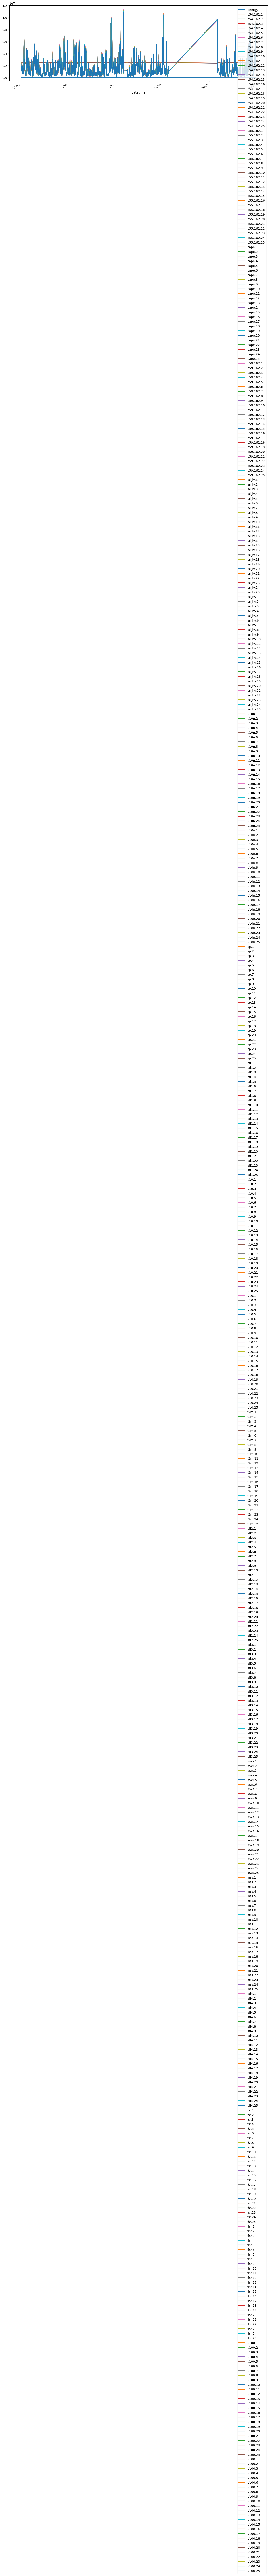

In [8]:
wind_ava.plot(figsize=(15, 5))

#### Con esto se puede observar todos los distintos datos que hay en los datos que vamos a utilizar. Estos son 22 datos meteorlógicos los cuales son las variables, que a su vez tienen una cuadrícula de 5x5 que representan a las 25 localizaciones. Para esta práctica, solo se van a utilizar las de la localización 13.

In [9]:
for c in wind_ava.columns:
    if not c.endswith('.13') and c != 'energy':
        wind_ava.drop(c, axis = 1, inplace=True)

In [10]:
wind_ava

,energy,p54.162.13,p55.162.13,cape.13,p59.162.13,lai_lv.13,lai_hv.13,u10n.13,v10n.13,sp.13,...,t2m.13,stl2.13,stl3.13,iews.13,inss.13,stl4.13,fsr.13,flsr.13,u100.13,v100.13
datetime,,,,,,,,,,,,,,,,,,,,,
2005-01-02 18:00:00,402.71,2.510824e+06,9.186295,13.527577,1.386937e+06,2.344111,2.432983,-0.757587,-1.922799,99846.319914,...,280.473098,281.042026,281.462478,-0.057958,-0.138650,284.684755,0.404731,-5.927092,-1.780562,-4.443617
2005-01-03 00:00:00,696.80,2.513173e+06,8.849569,6.896412,1.153526e+06,2.343719,2.432838,-1.412620,-1.403011,99917.733093,...,278.286616,280.747406,281.486541,-0.103576,-0.083050,284.667948,0.404920,-5.913881,-3.743344,-3.129469
2005-01-03 06:00:00,1591.15,2.509627e+06,7.924080,4.774439,1.098754e+06,2.343300,2.432704,-2.290185,-0.754580,99764.378681,...,277.206490,280.114863,281.487095,-0.165721,-0.036241,284.651914,0.405704,-5.908272,-5.097203,-1.157748
2005-01-03 12:00:00,1338.62,2.510571e+06,6.922709,0.000000,1.076021e+06,2.342830,2.432514,-3.497855,1.271028,99672.670459,...,280.926600,279.991138,281.472435,-0.275550,0.098192,284.636266,0.403967,-5.961995,-4.500835,1.502478
2005-01-03 18:00:00,562.50,2.505664e+06,6.646282,0.000000,1.070830e+06,2.342437,2.432369,-0.971249,0.553060,99372.811211,...,277.363875,280.576898,281.473265,-0.056553,0.041844,284.620232,0.403808,-5.987860,-3.392324,2.131114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2009-12-30 06:00:00,1280.13,2.385772e+06,14.413342,24.971074,3.905586e+06,2.349839,2.434994,4.595786,5.563189,95460.434452,...,280.731326,282.643490,281.676560,0.628948,0.879581,286.013271,0.424510,-5.715421,6.922743,9.179816
2009-12-30 12:00:00,855.00,2.385708e+06,12.802883,60.248874,2.745694e+06,2.349446,2.434849,4.894838,5.577096,95663.765406,...,283.310687,282.370909,281.761750,0.740926,0.699769,285.988737,0.424762,-5.732455,7.434887,7.537381
2009-12-30 18:00:00,117.06,2.379049e+06,10.915997,3.145067,2.254171e+06,2.349054,2.434715,0.958361,0.948029,95653.110509,...,281.060085,282.425812,281.841961,0.109802,0.125174,285.968452,0.415132,-5.866856,3.033799,3.568993


### Naturaleza de las variables y tipo de problema

#### Tras esto, se pueden responder a varias preguntas que se proponen en el enunciado. Las variables que vamos a utilizar son de tipo numérico y hay un total de 4748 instancias. Además, con esto se puede observar que se trata de un problema de regresión, ya que el objetivo final de esta práctica es predecir ciertos valores de la variable energía. 

Tras esto, vamos a empezar la limpieza de los datos fijandonos en cómo nos los han dado

<Axes: xlabel='datetime'>

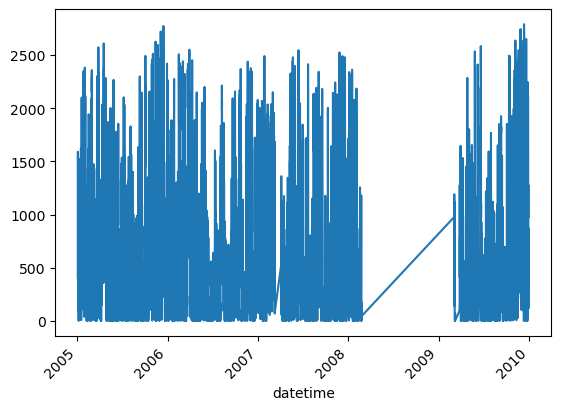

In [11]:
wind_ava['energy'].plot(rot=45)

Al observar esto, se observa que hay un salto entre el año 2008 y 2009, por lo que vamos a observar cuando se produce esa perdida de datos para poder saber que hacer con ellos


In [12]:
instances_per_day = wind_ava.resample('D').size()

In [13]:
time_diff = wind_ava.index.to_series().diff().dt.days

In [14]:
time_diff

datetime
2005-01-02 18:00:00    NaN
2005-01-03 00:00:00    0.0
2005-01-03 06:00:00    0.0
2005-01-03 12:00:00    0.0
2005-01-03 18:00:00    0.0
                      ... 
2009-12-30 06:00:00    0.0
2009-12-30 12:00:00    0.0
2009-12-30 18:00:00    0.0
2009-12-31 12:00:00    0.0
2009-12-31 18:00:00    0.0
Name: datetime, Length: 4748, dtype: float64

In [15]:
missing_days = time_diff[time_diff > 1]

In [16]:
missing_days

datetime
2006-01-23 12:00:00      3.0
2007-04-04 18:00:00     24.0
2007-09-28 18:00:00      3.0
2007-12-31 12:00:00      2.0
2008-02-12 00:00:00      2.0
2009-03-05 12:00:00    373.0
2009-03-26 18:00:00     17.0
2009-06-19 12:00:00      8.0
2009-08-17 18:00:00      2.0
2009-09-27 00:00:00      2.0
2009-09-29 12:00:00      2.0
Name: datetime, dtype: float64

Tras esto, se va observar que hay datos hasta el 26 de febrero del 2008 y luego hay un parón hasta el 5 de marzo del 2009 (ya que hay un parón de 373 días antes del 5 de marzo del 2009). Hay otros parones en los que tampoco hay datos, pero no son tan relevantes como el anteriormente nombrado. 

### El siguiente paso en nuestra limpieza de datos es la de los Valores Faltantes

In [17]:
wind_ava.isna()

,energy,p54.162.13,p55.162.13,cape.13,p59.162.13,lai_lv.13,lai_hv.13,u10n.13,v10n.13,sp.13,...,t2m.13,stl2.13,stl3.13,iews.13,inss.13,stl4.13,fsr.13,flsr.13,u100.13,v100.13
datetime,,,,,,,,,,,,,,,,,,,,,
2005-01-02 18:00:00,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2005-01-03 00:00:00,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2005-01-03 06:00:00,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2005-01-03 12:00:00,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2005-01-03 18:00:00,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2009-12-30 06:00:00,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2009-12-30 12:00:00,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2009-12-30 18:00:00,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [18]:
wind_ava.isna().sum()

energy        0
p54.162.13    0
p55.162.13    0
cape.13       0
p59.162.13    0
lai_lv.13     0
lai_hv.13     0
u10n.13       0
v10n.13       0
sp.13         0
stl1.13       0
u10.13        0
v10.13        0
t2m.13        0
stl2.13       0
stl3.13       0
iews.13       0
inss.13       0
stl4.13       0
fsr.13        0
flsr.13       0
u100.13       0
v100.13       0
dtype: int64

Con esto se puede observar como no hay ninguna variable faltante. Esto significa que en los días que se han recogido datos, se reccogen todos los datos correctamente, sin dejar ninguno con valor Nulo o en Blanco o siendo un NotaNumber, por lo que no eliminamos ninguna columna en este paso.

#### Otro metódo de ver si se pueden eliminar variables es viendo si hay una alta correlación entre dos variables. Si hay una correlación entre dos variables de más de 0.9, eliminaremos uno de las dos

In [19]:
datos_a_evaluar = wind_ava.drop(columns=['energy'])

In [20]:
datos_a_evaluar

,p54.162.13,p55.162.13,cape.13,p59.162.13,lai_lv.13,lai_hv.13,u10n.13,v10n.13,sp.13,stl1.13,...,t2m.13,stl2.13,stl3.13,iews.13,inss.13,stl4.13,fsr.13,flsr.13,u100.13,v100.13
datetime,,,,,,,,,,,,,,,,,,,,,
2005-01-02 18:00:00,2.510824e+06,9.186295,13.527577,1.386937e+06,2.344111,2.432983,-0.757587,-1.922799,99846.319914,280.960661,...,280.473098,281.042026,281.462478,-0.057958,-0.138650,284.684755,0.404731,-5.927092,-1.780562,-4.443617
2005-01-03 00:00:00,2.513173e+06,8.849569,6.896412,1.153526e+06,2.343719,2.432838,-1.412620,-1.403011,99917.733093,279.296651,...,278.286616,280.747406,281.486541,-0.103576,-0.083050,284.667948,0.404920,-5.913881,-3.743344,-3.129469
2005-01-03 06:00:00,2.509627e+06,7.924080,4.774439,1.098754e+06,2.343300,2.432704,-2.290185,-0.754580,99764.378681,278.233956,...,277.206490,280.114863,281.487095,-0.165721,-0.036241,284.651914,0.405704,-5.908272,-5.097203,-1.157748
2005-01-03 12:00:00,2.510571e+06,6.922709,0.000000,1.076021e+06,2.342830,2.432514,-3.497855,1.271028,99672.670459,280.787263,...,280.926600,279.991138,281.472435,-0.275550,0.098192,284.636266,0.403967,-5.961995,-4.500835,1.502478
2005-01-03 18:00:00,2.505664e+06,6.646282,0.000000,1.070830e+06,2.342437,2.432369,-0.971249,0.553060,99372.811211,279.583112,...,277.363875,280.576898,281.473265,-0.056553,0.041844,284.620232,0.403808,-5.987860,-3.392324,2.131114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2009-12-30 06:00:00,2.385772e+06,14.413342,24.971074,3.905586e+06,2.349839,2.434994,4.595786,5.563189,95460.434452,281.680110,...,280.731326,282.643490,281.676560,0.628948,0.879581,286.013271,0.424510,-5.715421,6.922743,9.179816
2009-12-30 12:00:00,2.385708e+06,12.802883,60.248874,2.745694e+06,2.349446,2.434849,4.894838,5.577096,95663.765406,282.842686,...,283.310687,282.370909,281.761750,0.740926,0.699769,285.988737,0.424762,-5.732455,7.434887,7.537381
2009-12-30 18:00:00,2.379049e+06,10.915997,3.145067,2.254171e+06,2.349054,2.434715,0.958361,0.948029,95653.110509,282.027412,...,281.060085,282.425812,281.841961,0.109802,0.125174,285.968452,0.415132,-5.866856,3.033799,3.568993


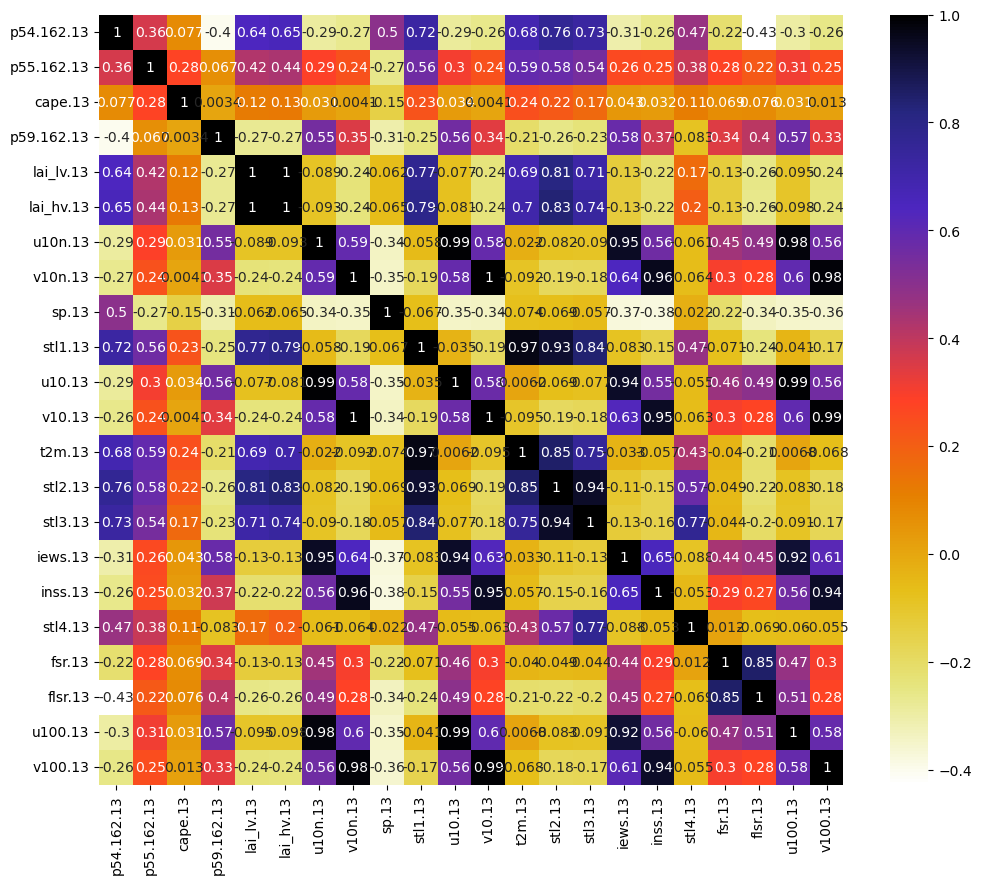

In [21]:
import seaborn as sns
plt.figure(figsize=(12,10))
cor = datos_a_evaluar.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

Con esto, se puede observar que hay correlación exacta entre lai_lv.13 y lai_hv.13, entre v10n.13 y v10.13. Hay una correlación de casi de 1 en diversos casos, eliminando los casos que tengan una correlación mayor de 0.95. Por esto, vamos a eliminar las columnas de lai_lv.13, u10n.13, u10.13, v10n.13,v10.13 y stl1.13 

In [69]:
datos_un_poco_filtrados = wind_ava.drop(columns=['energy', 'lai_lv.13', 'u10n.13', 'u10.13', 'v10n.13', 'v10.13', 'stl1.13'])

In [70]:
datos_un_poco_filtrados

,p54.162.13,p55.162.13,cape.13,p59.162.13,lai_hv.13,sp.13,t2m.13,stl2.13,stl3.13,iews.13,inss.13,stl4.13,fsr.13,flsr.13,u100.13,v100.13
datetime,,,,,,,,,,,,,,,,
2005-01-02 18:00:00,2.510824e+06,9.186295,13.527577,1.386937e+06,2.432983,99846.319914,280.473098,281.042026,281.462478,-0.057958,-0.138650,284.684755,0.404731,-5.927092,-1.780562,-4.443617
2005-01-03 00:00:00,2.513173e+06,8.849569,6.896412,1.153526e+06,2.432838,99917.733093,278.286616,280.747406,281.486541,-0.103576,-0.083050,284.667948,0.404920,-5.913881,-3.743344,-3.129469
2005-01-03 06:00:00,2.509627e+06,7.924080,4.774439,1.098754e+06,2.432704,99764.378681,277.206490,280.114863,281.487095,-0.165721,-0.036241,284.651914,0.405704,-5.908272,-5.097203,-1.157748
2005-01-03 12:00:00,2.510571e+06,6.922709,0.000000,1.076021e+06,2.432514,99672.670459,280.926600,279.991138,281.472435,-0.275550,0.098192,284.636266,0.403967,-5.961995,-4.500835,1.502478
2005-01-03 18:00:00,2.505664e+06,6.646282,0.000000,1.070830e+06,2.432369,99372.811211,277.363875,280.576898,281.473265,-0.056553,0.041844,284.620232,0.403808,-5.987860,-3.392324,2.131114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2009-12-30 06:00:00,2.385772e+06,14.413342,24.971074,3.905586e+06,2.434994,95460.434452,280.731326,282.643490,281.676560,0.628948,0.879581,286.013271,0.424510,-5.715421,6.922743,9.179816
2009-12-30 12:00:00,2.385708e+06,12.802883,60.248874,2.745694e+06,2.434849,95663.765406,283.310687,282.370909,281.761750,0.740926,0.699769,285.988737,0.424762,-5.732455,7.434887,7.537381
2009-12-30 18:00:00,2.379049e+06,10.915997,3.145067,2.254171e+06,2.434715,95653.110509,281.060085,282.425812,281.841961,0.109802,0.125174,285.968452,0.415132,-5.866856,3.033799,3.568993


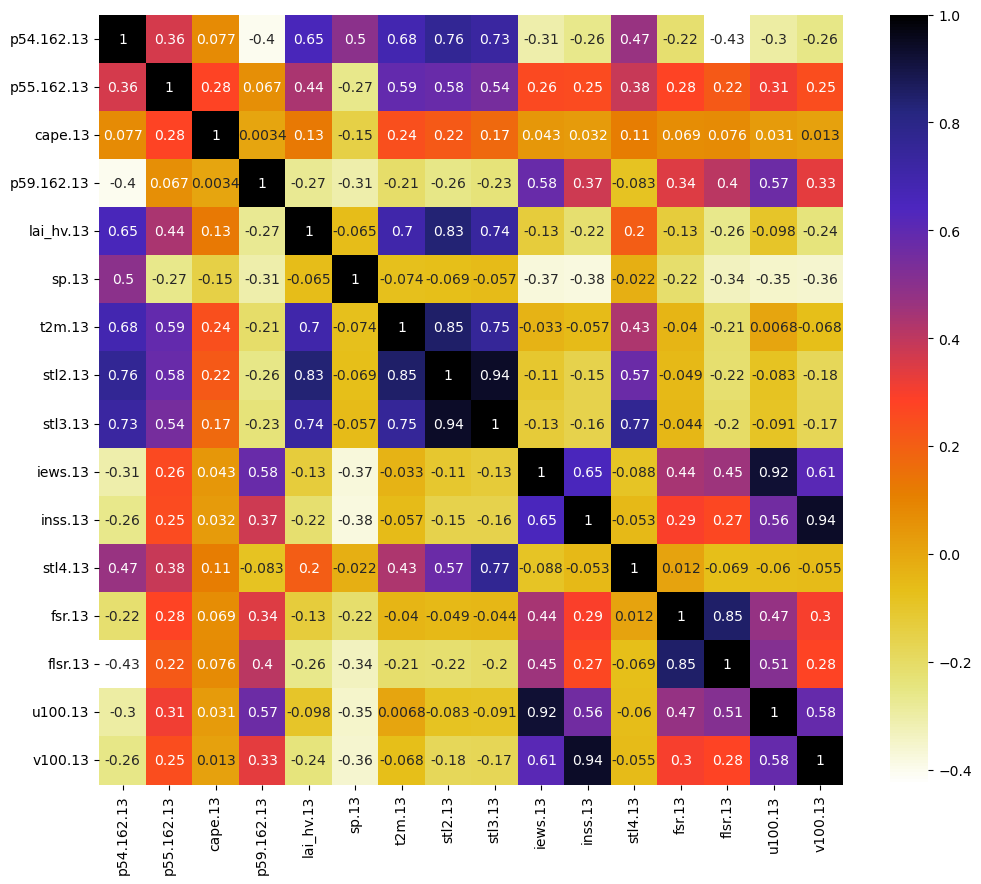

In [71]:
import seaborn as sns
plt.figure(figsize=(12,10))
cor = datos_un_poco_filtrados.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

### Ahora vamos a poder analizar si cada uno de las variables tiene valores atípicos. 

<Axes: >

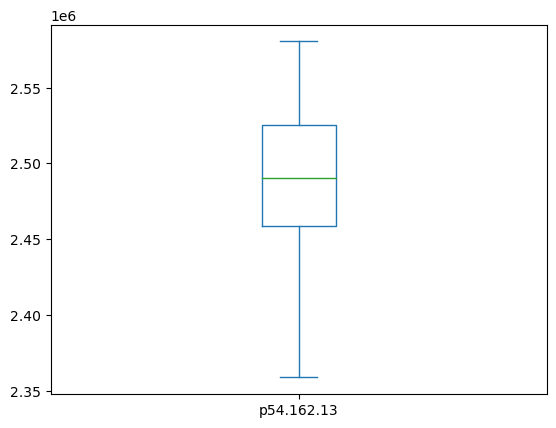

In [73]:
wind_ava['p54.162.13'].plot.box()

<Axes: >

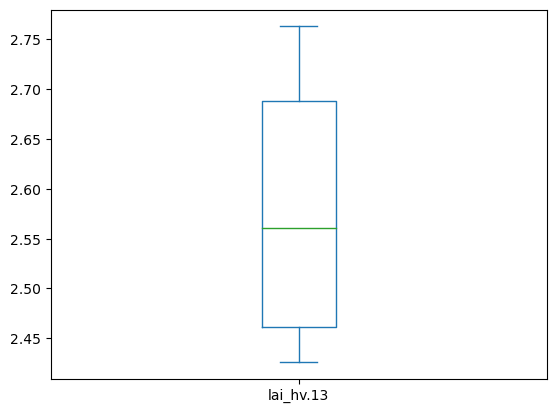

In [74]:
wind_ava['lai_hv.13'].plot.box()

<Axes: >

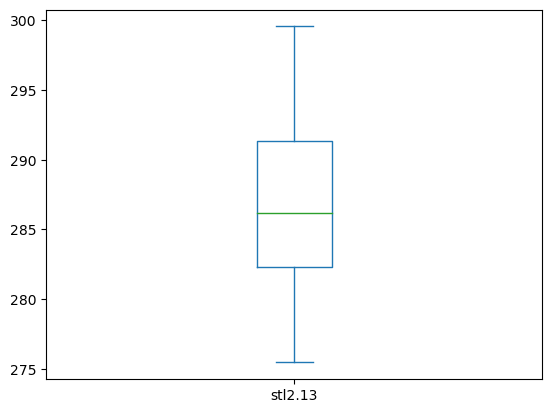

In [75]:
wind_ava['stl2.13'].plot.box()

<Axes: >

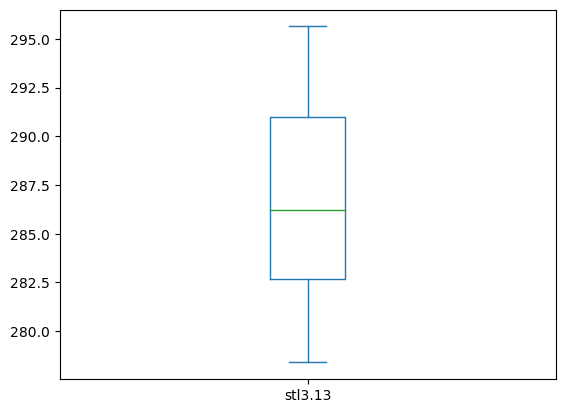

In [76]:
wind_ava['stl3.13'].plot.box()

<Axes: >

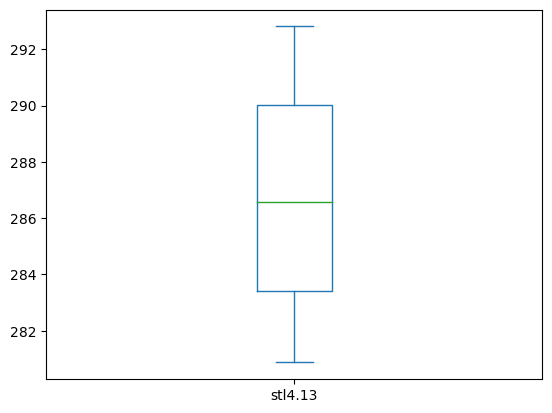

In [77]:
wind_ava['stl4.13'].plot.box()

Estas variables no tienen ningún valor fuera del Q1 y del Q3. Ahora vamos a analizar el resto de variables

<Axes: >

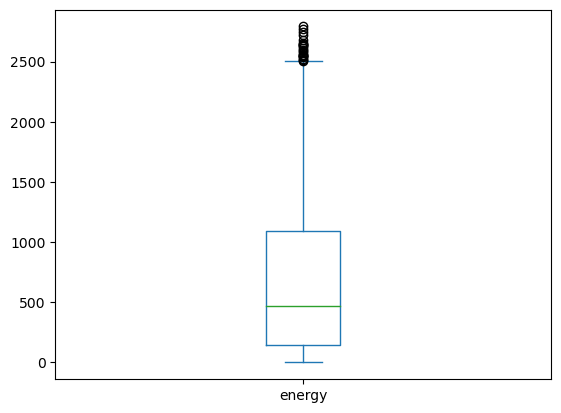

In [25]:
wind_ava['energy'].plot.box()

<Axes: ylabel='Frequency'>

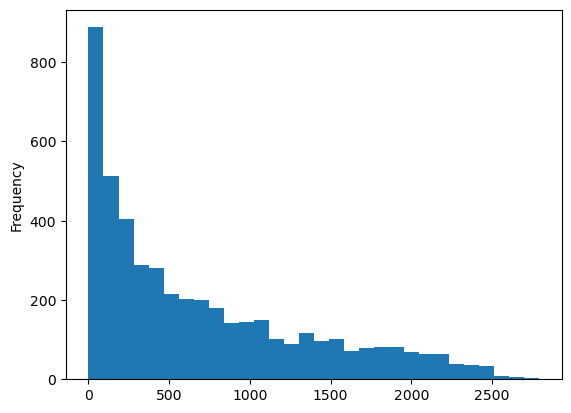

In [26]:
wind_ava['energy'].plot.hist(bins = 30)

Aunque en este caso, la variable a predecir 'energy' tiene valores atípicos, se puede observar que estos valores no pueden ser eliminados ya que aportan una información relevante. Aun así, lo transformamos a logaritmo ya que así obtendremos mejores resultados 

In [82]:
datos_a_utilizar = wind_ava.drop(columns=['lai_lv.13', 'u10n.13', 'u10.13', 'v10n.13', 'v10.13', 'stl1.13'])

In [84]:
datos_a_utilizar['log_energy'] = np.log(datos_a_utilizar['energy'])

In [85]:
datos_a_utilizar

,energy,p54.162.13,p55.162.13,cape.13,p59.162.13,lai_hv.13,sp.13,t2m.13,stl2.13,stl3.13,iews.13,inss.13,stl4.13,fsr.13,flsr.13,u100.13,v100.13,log_energy
datetime,,,,,,,,,,,,,,,,,,
2005-01-02 18:00:00,402.71,2.510824e+06,9.186295,13.527577,1.386937e+06,2.432983,99846.319914,280.473098,281.042026,281.462478,-0.057958,-0.138650,284.684755,0.404731,-5.927092,-1.780562,-4.443617,5.998217
2005-01-03 00:00:00,696.80,2.513173e+06,8.849569,6.896412,1.153526e+06,2.432838,99917.733093,278.286616,280.747406,281.486541,-0.103576,-0.083050,284.667948,0.404920,-5.913881,-3.743344,-3.129469,6.546498
2005-01-03 06:00:00,1591.15,2.509627e+06,7.924080,4.774439,1.098754e+06,2.432704,99764.378681,277.206490,280.114863,281.487095,-0.165721,-0.036241,284.651914,0.405704,-5.908272,-5.097203,-1.157748,7.372212
2005-01-03 12:00:00,1338.62,2.510571e+06,6.922709,0.000000,1.076021e+06,2.432514,99672.670459,280.926600,279.991138,281.472435,-0.275550,0.098192,284.636266,0.403967,-5.961995,-4.500835,1.502478,7.199395
2005-01-03 18:00:00,562.50,2.505664e+06,6.646282,0.000000,1.070830e+06,2.432369,99372.811211,277.363875,280.576898,281.473265,-0.056553,0.041844,284.620232,0.403808,-5.987860,-3.392324,2.131114,6.332391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2009-12-30 06:00:00,1280.13,2.385772e+06,14.413342,24.971074,3.905586e+06,2.434994,95460.434452,280.731326,282.643490,281.676560,0.628948,0.879581,286.013271,0.424510,-5.715421,6.922743,9.179816,7.154717
2009-12-30 12:00:00,855.00,2.385708e+06,12.802883,60.248874,2.745694e+06,2.434849,95663.765406,283.310687,282.370909,281.761750,0.740926,0.699769,285.988737,0.424762,-5.732455,7.434887,7.537381,6.751101
2009-12-30 18:00:00,117.06,2.379049e+06,10.915997,3.145067,2.254171e+06,2.434715,95653.110509,281.060085,282.425812,281.841961,0.109802,0.125174,285.968452,0.415132,-5.866856,3.033799,3.568993,4.762687


<Axes: >

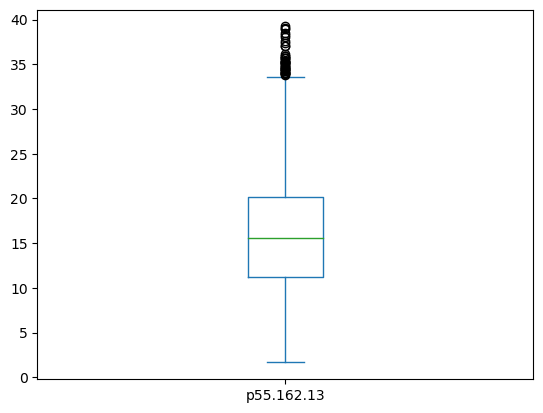

In [80]:
wind_ava['p55.162.13'].plot.box()

<Axes: ylabel='Frequency'>

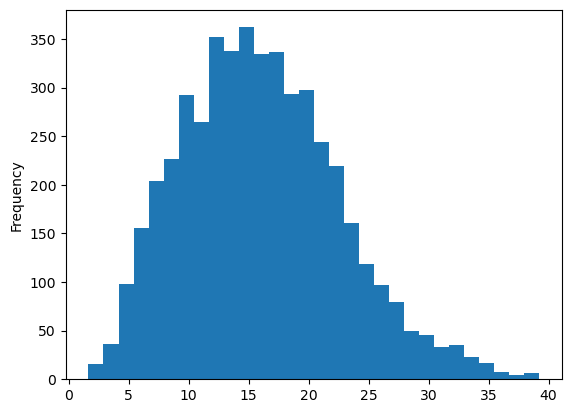

In [30]:
wind_ava['p55.162.13'].plot.hist(bins = 30)

<Axes: >

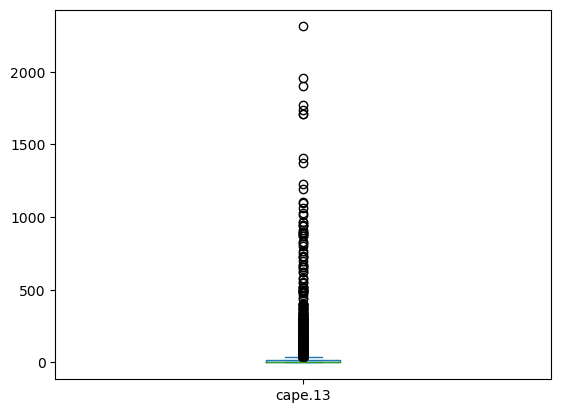

In [31]:
wind_ava['cape.13'].plot.box()

<Axes: ylabel='Frequency'>

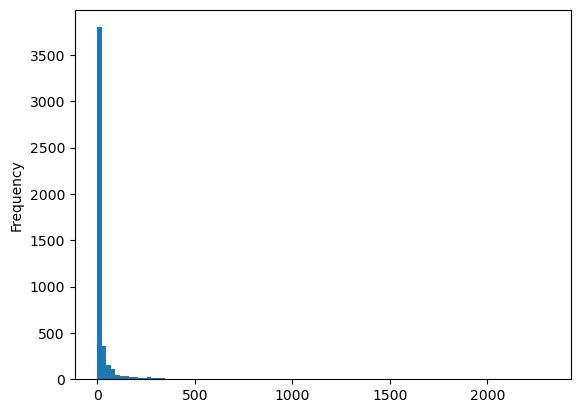

In [32]:
wind_ava['cape.13'].plot.hist(bins = 100)

<Axes: >

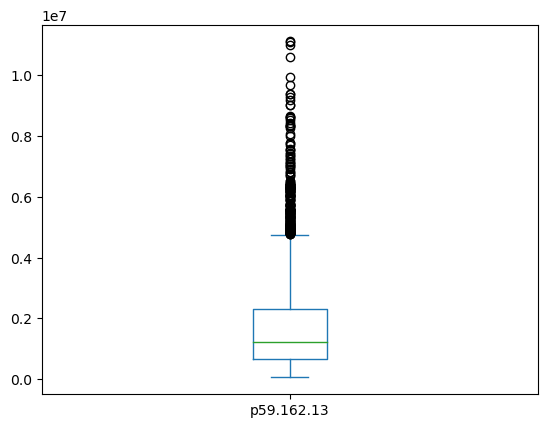

In [33]:
wind_ava['p59.162.13'].plot.box()

<Axes: ylabel='Frequency'>

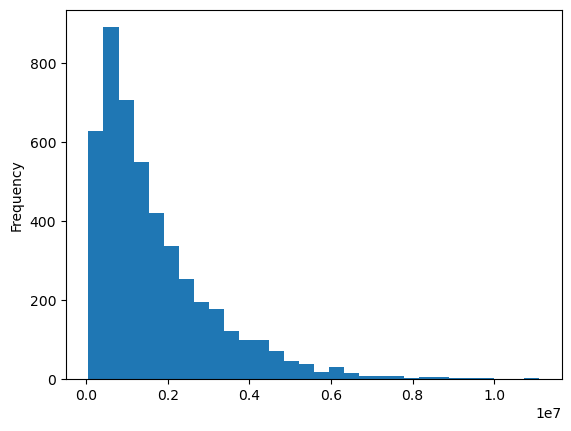

In [34]:
wind_ava['p59.162.13'].plot.hist(bins = 30)

<Axes: >

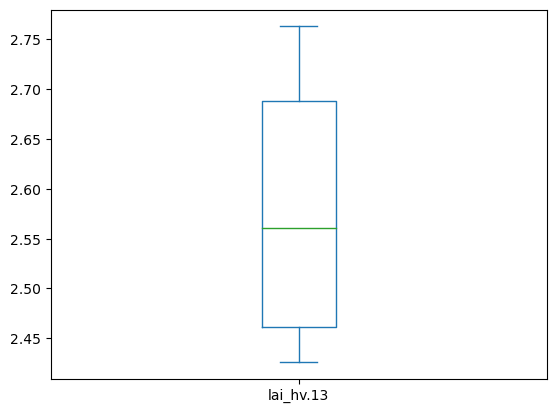

In [37]:
wind_ava['lai_hv.13'].plot.box()

<Axes: ylabel='Frequency'>

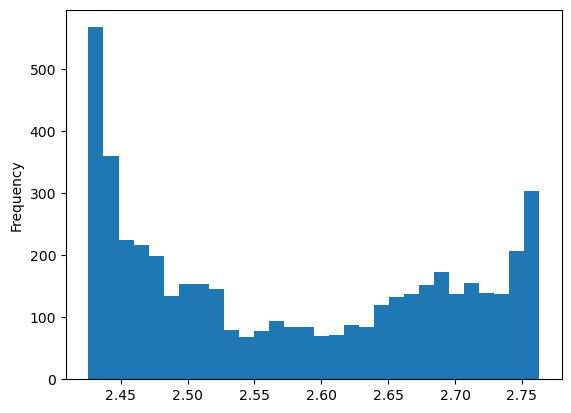

In [38]:
wind_ava['lai_hv.13'].plot.hist(bins = 30)

<Axes: >

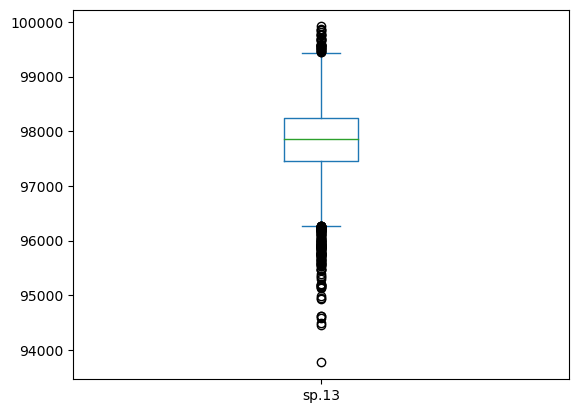

In [43]:
wind_ava['sp.13'].plot.box()

<Axes: ylabel='Frequency'>

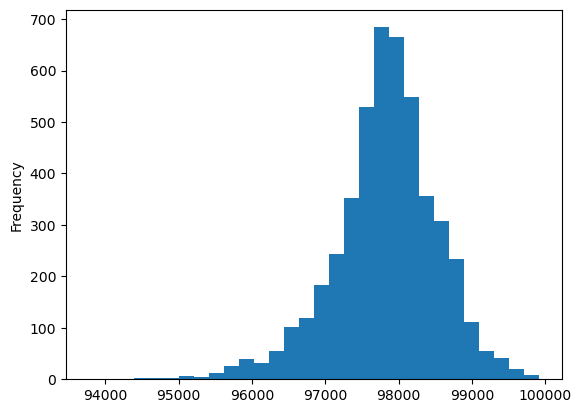

In [44]:
wind_ava['sp.13'].plot.hist(bins = 30)

<Axes: >

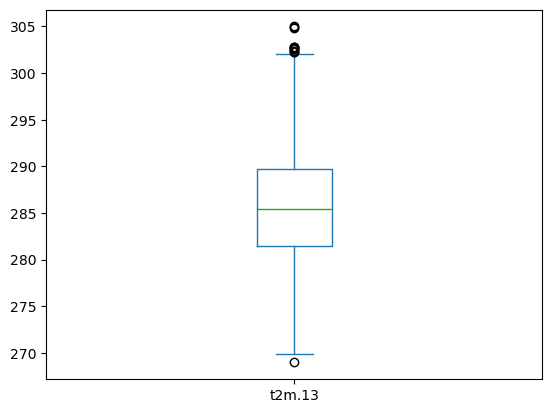

In [51]:
wind_ava['t2m.13'].plot.box()

<Axes: ylabel='Frequency'>

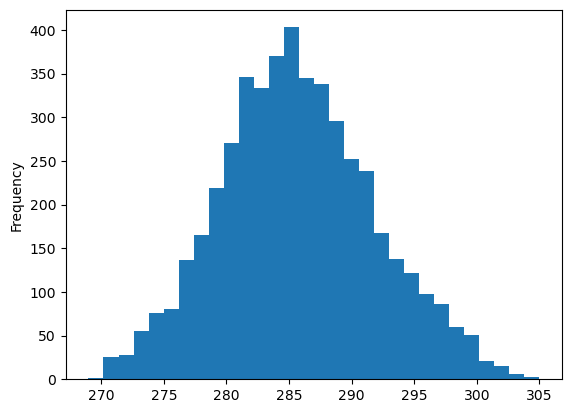

In [52]:
wind_ava['t2m.13'].plot.hist(bins = 30)

<Axes: >

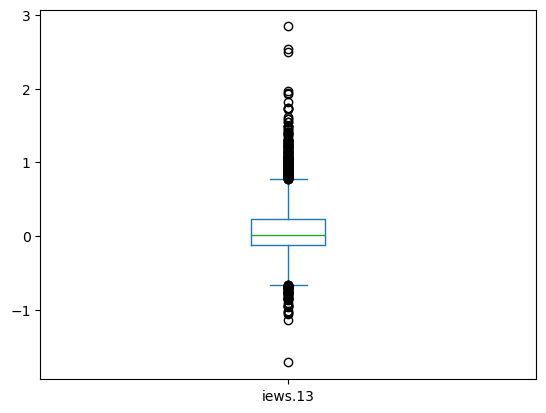

In [54]:
wind_ava['iews.13'].plot.box()

<Axes: ylabel='Frequency'>

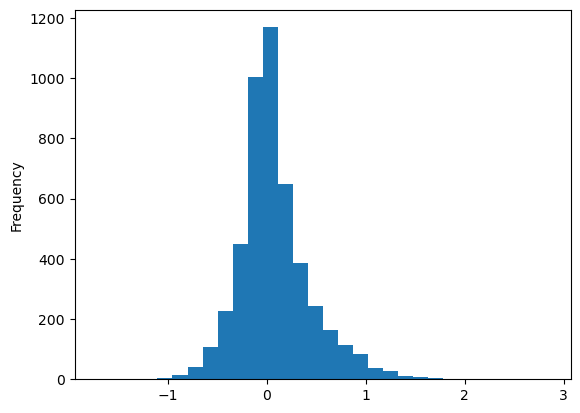

In [55]:
wind_ava['iews.13'].plot.hist(bins = 30)

<Axes: >

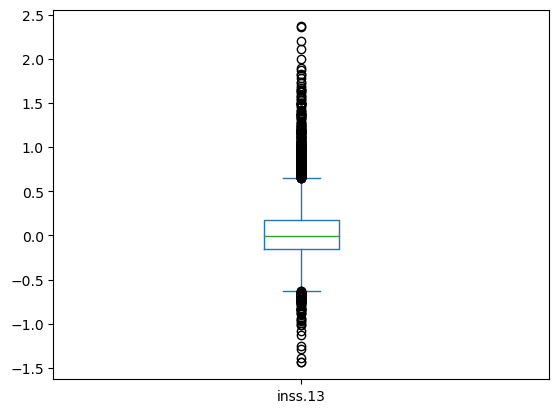

In [56]:
wind_ava['inss.13'].plot.box()

<Axes: ylabel='Frequency'>

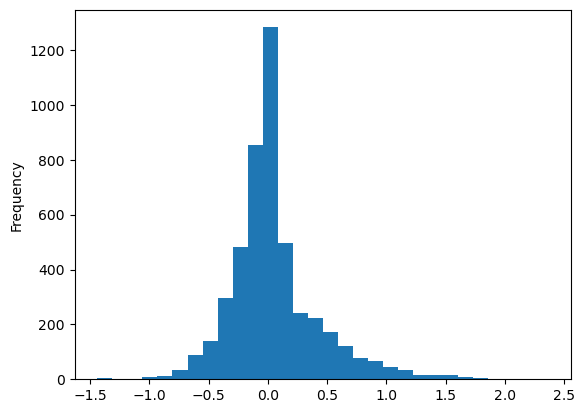

In [57]:
wind_ava['inss.13'].plot.hist(bins = 30)

<Axes: >

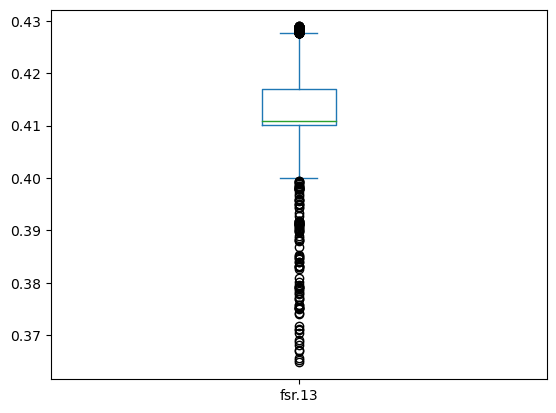

In [60]:
wind_ava['fsr.13'].plot.box()

<Axes: ylabel='Frequency'>

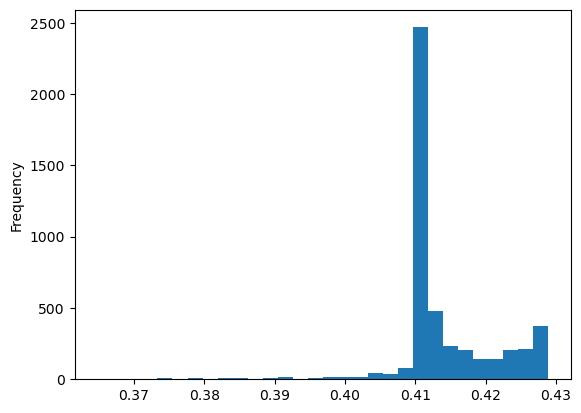

In [61]:
wind_ava['fsr.13'].plot.hist(bins = 30)

<Axes: >

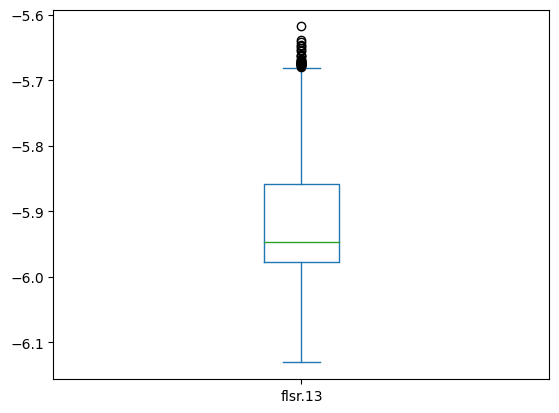

In [62]:
wind_ava['flsr.13'].plot.box()

<Axes: ylabel='Frequency'>

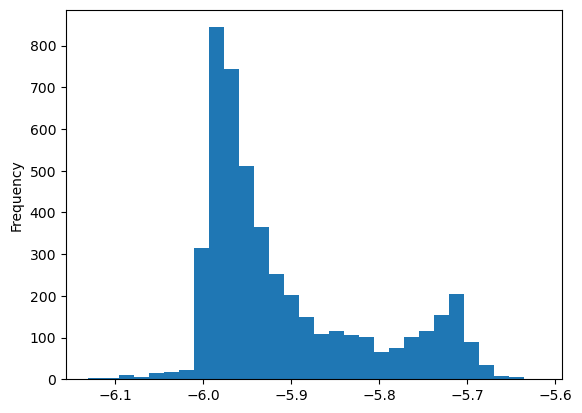

In [63]:
wind_ava['flsr.13'].plot.hist(bins = 30)

<Axes: >

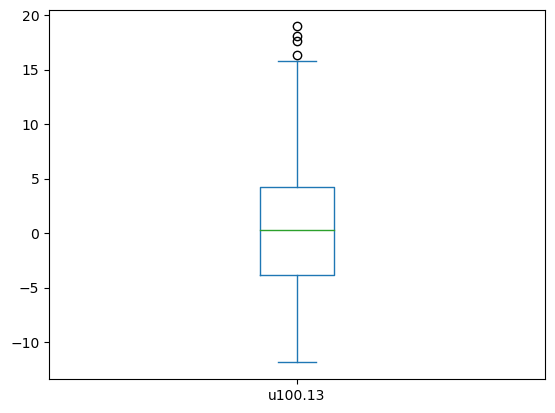

In [64]:
wind_ava['u100.13'].plot.box()

<Axes: ylabel='Frequency'>

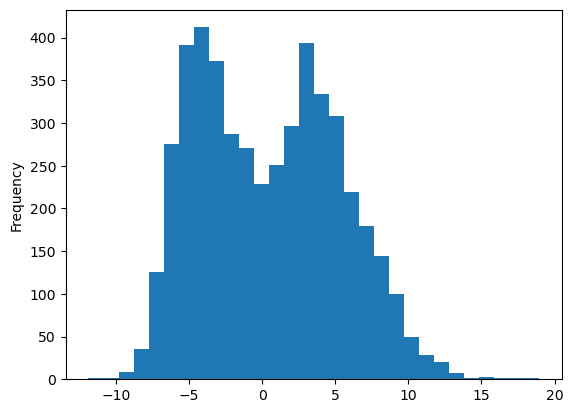

In [65]:
wind_ava['u100.13'].plot.hist(bins = 30)

<Axes: >

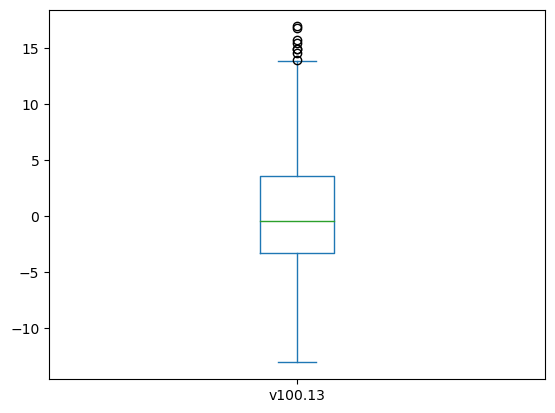

In [66]:
wind_ava['v100.13'].plot.box()

<Axes: ylabel='Frequency'>

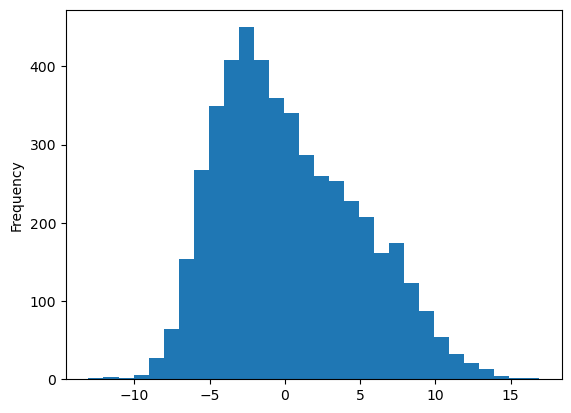

In [67]:
wind_ava['v100.13'].plot.hist(bins = 30)

#### El siguiente paso es comprobar si hay Columnas Constantes

In [86]:
datos_un_poco_filtrados.std()

p54.162.13    4.482599e+04
p55.162.13    6.552216e+00
cape.13       1.217590e+02
p59.162.13    1.466953e+06
lai_hv.13     1.164342e-01
sp.13         7.136897e+02
t2m.13        6.163483e+00
stl2.13       5.547947e+00
stl3.13       4.582827e+00
iews.13       3.670135e-01
inss.13       3.790142e-01
stl4.13       3.552873e+00
fsr.13        7.602132e-03
flsr.13       9.435944e-02
u100.13       4.841730e+00
v100.13       4.667552e+00
dtype: float64

In [87]:
datos_un_poco_filtrados

,p54.162.13,p55.162.13,cape.13,p59.162.13,lai_hv.13,sp.13,t2m.13,stl2.13,stl3.13,iews.13,inss.13,stl4.13,fsr.13,flsr.13,u100.13,v100.13
datetime,,,,,,,,,,,,,,,,
2005-01-02 18:00:00,2.510824e+06,9.186295,13.527577,1.386937e+06,2.432983,99846.319914,280.473098,281.042026,281.462478,-0.057958,-0.138650,284.684755,0.404731,-5.927092,-1.780562,-4.443617
2005-01-03 00:00:00,2.513173e+06,8.849569,6.896412,1.153526e+06,2.432838,99917.733093,278.286616,280.747406,281.486541,-0.103576,-0.083050,284.667948,0.404920,-5.913881,-3.743344,-3.129469
2005-01-03 06:00:00,2.509627e+06,7.924080,4.774439,1.098754e+06,2.432704,99764.378681,277.206490,280.114863,281.487095,-0.165721,-0.036241,284.651914,0.405704,-5.908272,-5.097203,-1.157748
2005-01-03 12:00:00,2.510571e+06,6.922709,0.000000,1.076021e+06,2.432514,99672.670459,280.926600,279.991138,281.472435,-0.275550,0.098192,284.636266,0.403967,-5.961995,-4.500835,1.502478
2005-01-03 18:00:00,2.505664e+06,6.646282,0.000000,1.070830e+06,2.432369,99372.811211,277.363875,280.576898,281.473265,-0.056553,0.041844,284.620232,0.403808,-5.987860,-3.392324,2.131114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2009-12-30 06:00:00,2.385772e+06,14.413342,24.971074,3.905586e+06,2.434994,95460.434452,280.731326,282.643490,281.676560,0.628948,0.879581,286.013271,0.424510,-5.715421,6.922743,9.179816
2009-12-30 12:00:00,2.385708e+06,12.802883,60.248874,2.745694e+06,2.434849,95663.765406,283.310687,282.370909,281.761750,0.740926,0.699769,285.988737,0.424762,-5.732455,7.434887,7.537381
2009-12-30 18:00:00,2.379049e+06,10.915997,3.145067,2.254171e+06,2.434715,95653.110509,281.060085,282.425812,281.841961,0.109802,0.125174,285.968452,0.415132,-5.866856,3.033799,3.568993


#### Tras toda la limpieza, se puede concluir que en nuestros datos filtrados son solo 16 y con XXX instancias. 

## Ahora vamos a definir lo del outer y el inner